## Question 3.a,b

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import datasets
import random
from math import log

In [2]:
#loading data and preprocessing
iris = datasets.load_iris()
#iris=pd.DataFrame(iris)
features=iris['data']
features=np.delete(features, np.s_[1:3], axis=1)      #removing all columns except sepal length and petal width
feature_names=iris['feature_names']
target=iris['target']
for i,j in enumerate(target):              #encoding target values=virginica as 1 and!=virginica as -1
    if j!=2:
        target[i]=-1
    else:
        target[i]=1

In [3]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [4]:
features

array([[5.1, 0.2],
       [4.9, 0.2],
       [4.7, 0.2],
       [4.6, 0.2],
       [5. , 0.2],
       [5.4, 0.4],
       [4.6, 0.3],
       [5. , 0.2],
       [4.4, 0.2],
       [4.9, 0.1],
       [5.4, 0.2],
       [4.8, 0.2],
       [4.8, 0.1],
       [4.3, 0.1],
       [5.8, 0.2],
       [5.7, 0.4],
       [5.4, 0.4],
       [5.1, 0.3],
       [5.7, 0.3],
       [5.1, 0.3],
       [5.4, 0.2],
       [5.1, 0.4],
       [4.6, 0.2],
       [5.1, 0.5],
       [4.8, 0.2],
       [5. , 0.2],
       [5. , 0.4],
       [5.2, 0.2],
       [5.2, 0.2],
       [4.7, 0.2],
       [4.8, 0.2],
       [5.4, 0.4],
       [5.2, 0.1],
       [5.5, 0.2],
       [4.9, 0.2],
       [5. , 0.2],
       [5.5, 0.2],
       [4.9, 0.1],
       [4.4, 0.2],
       [5.1, 0.2],
       [5. , 0.3],
       [4.5, 0.3],
       [4.4, 0.2],
       [5. , 0.6],
       [5.1, 0.4],
       [4.8, 0.3],
       [5.1, 0.2],
       [4.6, 0.2],
       [5.3, 0.2],
       [5. , 0.2],
       [7. , 1.4],
       [6.4, 1.5],
       [6.9,

In [5]:
target_=pd.DataFrame({'Target':target})    #target encoded as 0:Not Viginica, 2: Virginica
target_

,Target
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


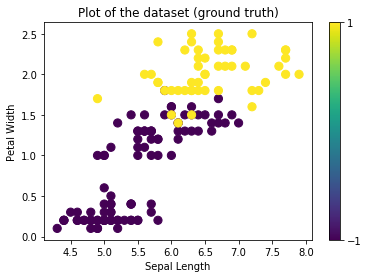

In [6]:
weight=np.array([1]*len(np.array(target)))/150          #assigning initial weight of 1/N to each point
plt.scatter(features[:,0], features[:,1],c=target,s = weight*10000)
plt.colorbar(ticks = [-1,1])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.title('Plot of the dataset (ground truth)')
plt.show()

Iteration No. :  1
Alpha_m :  1.5890269151739729
Accuracy of :  0.96


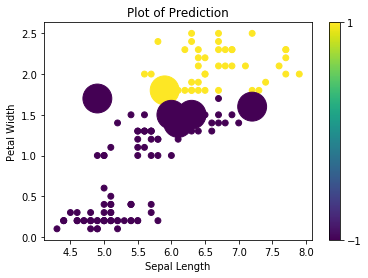

Iteration No. :  2
Alpha_m :  0.8431994767851153
Accuracy of :  0.8533333333333334


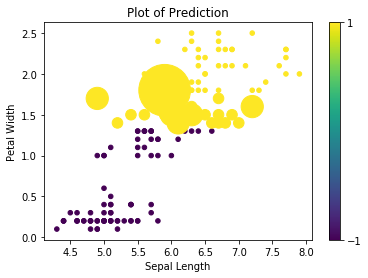

Iteration No. :  3
Alpha_m :  0.5100175176660464
Accuracy of :  0.7933333333333333


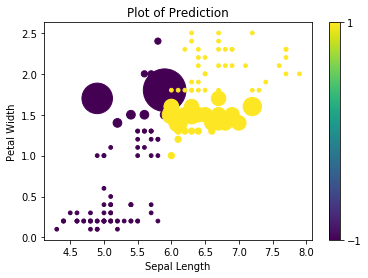

Iteration No. :  4
Alpha_m :  0.5615790747790673
Accuracy of :  0.8933333333333333


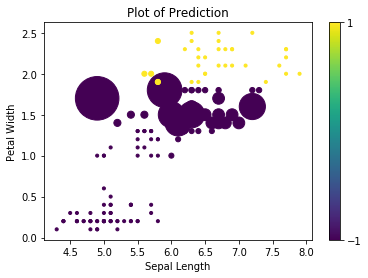

In [7]:
#addaboost

target1=target.reshape(-1,1)
def addaboost(n,weight_):   #addaboost for n iterations
    weight_=np.array([1]*len(np.array(target)))/150          #assigning initial weight of 1/N to each point
    for i in range(n):
        #weight=weight_
        tree=DecisionTreeClassifier(max_depth=1).fit(features,target1,sample_weight=weight_)
        prediction=tree.predict(features)
        tmp=np.array(prediction)-np.transpose(target1)[0]
        weighted_error=0
        for j,k in enumerate(tmp):
            if k!=0:
                weighted_error+=weight_[j]
        weighed_error=weighted_error/sum(weight_)
        a_m=0.5*log((1-weighted_error)/weighted_error)
        for j,k in enumerate(tmp):
            if k!=0:
                weight_[j]*=np.exp(a_m)
            else:
                weight_[j]*=np.exp(-1*a_m)
        weight_=weight_/sum(weight_)        #normalizing weight to 1
        print("Iteration No. : ",i+1)
        print("Alpha_m : ",a_m)
        print("Accuracy of : ",accuracy_score(np.transpose(target1)[0],prediction))
        plt.scatter(features[:,0], features[:,1],c=prediction,s = weight_*10000)
        plt.colorbar(ticks = [-1,1])
        plt.xlabel('Sepal Length')
        plt.ylabel('Petal Width')
        plt.title('Plot of Prediction')
        plt.show()

addaboost(4,weight)

## Question 3(b)

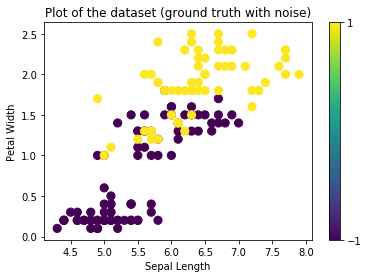

In [8]:
for i in range(90,100):             #adding noise
    target1[i]=1
new_target=target1
target_=np.transpose(target1)[0]
plt.scatter(features[:,0], features[:,1],c=target_,s = weight*10000)
plt.colorbar(ticks = [-1,1])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.title('Plot of the dataset (ground truth with noise)')
plt.show()


Iteration No. :  1
Alpha_m :  1.062625538855565
Accuracy of :  0.8933333333333333


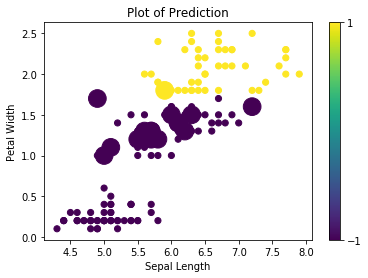

Iteration No. :  2
Alpha_m :  0.7691848821424867
Accuracy of :  0.7333333333333333


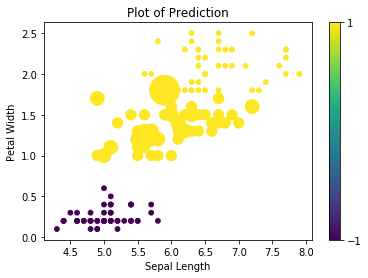

Iteration No. :  3
Alpha_m :  0.40092078272433745
Accuracy of :  0.8266666666666667


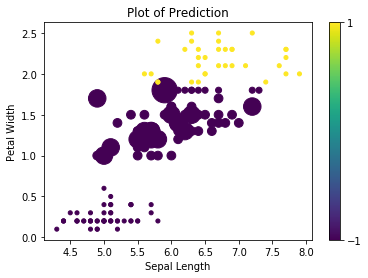

Iteration No. :  4
Alpha_m :  0.2830752203456811
Accuracy of :  0.7333333333333333


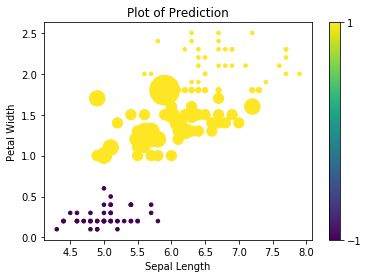

Iteration No. :  5
Alpha_m :  0.2196103751328614
Accuracy of :  0.8266666666666667


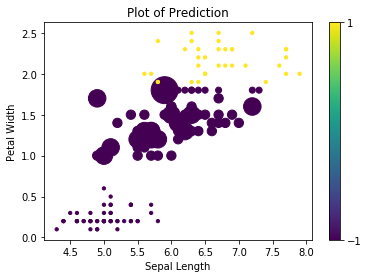

Iteration No. :  6
Alpha_m :  0.17963844763147055
Accuracy of :  0.7333333333333333


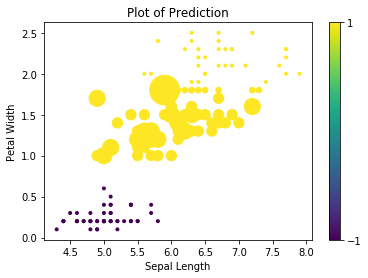

Iteration No. :  7
Alpha_m :  0.17215482107726005
Accuracy of :  0.68


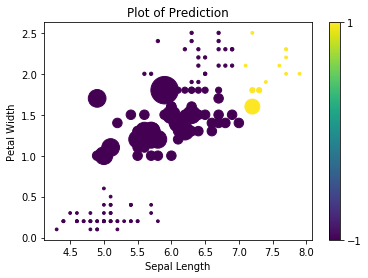

Iteration No. :  8
Alpha_m :  0.14668842104965713
Accuracy of :  0.7333333333333333


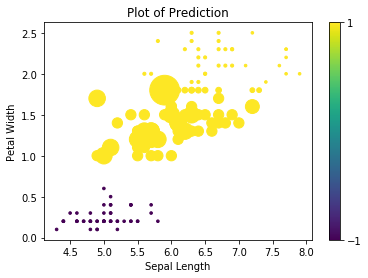

In [9]:
addaboost(8,weight)


As visible the accuracy decreases due to noise